In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

cust_df = pd.read_csv('./santander-customer-satisfaction/train.csv', encoding='latin-1')
print('database shape:', cust_df.shape)
cust_df.head(3)

database shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
print(cust_df.var3.value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [6]:
cust_df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [7]:
cust_df.reset_index(drop=True, inplace=True)
cust_df.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [8]:
cust_df['var3'].replace(-999999, 2, inplace=True)

# 피처 세트와 레이블 세트 분리, 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_feature = cust_df.iloc[:, :-1]
y_label = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_feature.shape))

피처 데이터 shape:(76020, 370)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feature, y_label, test_size=0.2, random_state=156)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape: {0}, 테스트 세트 Shape: {1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape: (60816, 370), 테스트 세트 Shape: (15204, 370)
학습 세트 레이블 값 분포 비율
0    0.960586
1    0.039414
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.959813
1    0.040187
Name: TARGET, dtype: float64


In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', 
                              eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.80126	validation_1-auc:0.795783
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.803529	validation_1-auc:0.797536
[2]	validation_0-auc:0.810813	validation_1-auc:0.80363
[3]	validation_0-auc:0.816048	validation_1-auc:0.807827
[4]	validation_0-auc:0.817069	validation_1-auc:0.807988
[5]	validation_0-auc:0.818023	validation_1-auc:0.807519
[6]	validation_0-auc:0.818041	validation_1-auc:0.80834
[7]	validation_0-auc:0.818929	validation_1-auc:0.808413
[8]	validation_0-auc:0.81893	validation_1-auc:0.809184
[9]	validation_0-auc:0.819261	validation_1-auc:0.808329
[10]	validation_0-auc:0.820557	validation_1-auc:0.810383
[11]	validation_0-auc:0.819808	validation_1-auc:0.808745
[12]	validation_0-auc:0.820479	validation_1-auc:0.809334
[13]	validation_0-auc:0.820346	validation_1-auc:0.809288
[14]	validation_0-auc:0.820919	validation_1-auc:0.809682
[

In [16]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth' : [ 5, 7], 'min_child_weight' : [ 1, 3], 'colsample_bytree' : [0.5, 0.75]}

# 하이퍼 파라미터 테스트의 수행속도를 향상시키기 위해 cv를 지정하지 않음
grid_cv = GridSearchCV(xgb_clf, param_grid=params)
grid_cv.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc",
                              eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', grid_cv.best_params_)                              

xgb_roc_score = roc_auc_score(y_test, grid_cv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

835813
[56]	validation_0-auc:0.887015	validation_1-auc:0.835289
[57]	validation_0-auc:0.887283	validation_1-auc:0.835389
[58]	validation_0-auc:0.887579	validation_1-auc:0.835488
[59]	validation_0-auc:0.887689	validation_1-auc:0.835849
[60]	validation_0-auc:0.887843	validation_1-auc:0.83599
[61]	validation_0-auc:0.888407	validation_1-auc:0.836187
[62]	validation_0-auc:0.888642	validation_1-auc:0.836092
[63]	validation_0-auc:0.888866	validation_1-auc:0.836067
[64]	validation_0-auc:0.88896	validation_1-auc:0.83628
[65]	validation_0-auc:0.889095	validation_1-auc:0.836301
[66]	validation_0-auc:0.889481	validation_1-auc:0.836337
[67]	validation_0-auc:0.889777	validation_1-auc:0.836362
[68]	validation_0-auc:0.88994	validation_1-auc:0.836257
[69]	validation_0-auc:0.890259	validation_1-auc:0.836258
[70]	validation_0-auc:0.891224	validation_1-auc:0.835938
[71]	validation_0-auc:0.891299	validation_1-auc:0.835842
[72]	validation_0-auc:0.891588	validation_1-auc:0.835621
[73]	validation_0-auc:0.8924

In [17]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.1, random_state=156)

params = {'max_depth' : [ 5, 7], 'min_child_weight' : [ 1, 3], 'colsample_bytree' : [0.5, 0.75]}

# 하이퍼 파라미터 테스트의 수행속도를 향상시키기 위해 cv를 지정하지 않음
grid_cv = GridSearchCV(xgb_clf, param_grid=params, cv=2)
grid_cv.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc",
                              eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', grid_cv.best_params_)                              

xgb_roc_score = roc_auc_score(y_test, grid_cv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

4	validation_1-auc:0.832662
[54]	validation_0-auc:0.876026	validation_1-auc:0.832802
[55]	validation_0-auc:0.876242	validation_1-auc:0.832846
[56]	validation_0-auc:0.876599	validation_1-auc:0.83309
[57]	validation_0-auc:0.876854	validation_1-auc:0.83341
[58]	validation_0-auc:0.877196	validation_1-auc:0.833414
[59]	validation_0-auc:0.877324	validation_1-auc:0.833321
[60]	validation_0-auc:0.877793	validation_1-auc:0.833476
[61]	validation_0-auc:0.877924	validation_1-auc:0.833642
[62]	validation_0-auc:0.878226	validation_1-auc:0.833526
[63]	validation_0-auc:0.878308	validation_1-auc:0.833625
[64]	validation_0-auc:0.87852	validation_1-auc:0.83363
[65]	validation_0-auc:0.878604	validation_1-auc:0.833685
[66]	validation_0-auc:0.87875	validation_1-auc:0.833664
[67]	validation_0-auc:0.87914	validation_1-auc:0.833373
[68]	validation_0-auc:0.879135	validation_1-auc:0.833497
[69]	validation_0-auc:0.879443	validation_1-auc:0.833443
[70]	validation_0-auc:0.879746	validation_1-auc:0.833349
[71]	vali

In [20]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# 성능평가 지표를 auc로 조기중당 파라미터 값은 200으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', 
                              eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')                            
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

-auc:0.841958
[458]	validation_0-auc:0.886374	validation_1-auc:0.841964
[459]	validation_0-auc:0.886429	validation_1-auc:0.841947
[460]	validation_0-auc:0.886467	validation_1-auc:0.841985
[461]	validation_0-auc:0.886569	validation_1-auc:0.842028
[462]	validation_0-auc:0.886626	validation_1-auc:0.842063
[463]	validation_0-auc:0.886703	validation_1-auc:0.84205
[464]	validation_0-auc:0.886734	validation_1-auc:0.84203
[465]	validation_0-auc:0.886757	validation_1-auc:0.842033
[466]	validation_0-auc:0.886769	validation_1-auc:0.842034
[467]	validation_0-auc:0.886793	validation_1-auc:0.842045
[468]	validation_0-auc:0.886833	validation_1-auc:0.842066
[469]	validation_0-auc:0.886847	validation_1-auc:0.84208
[470]	validation_0-auc:0.886871	validation_1-auc:0.842052
[471]	validation_0-auc:0.886882	validation_1-auc:0.842066
[472]	validation_0-auc:0.886927	validation_1-auc:0.842072
[473]	validation_0-auc:0.886941	validation_1-auc:0.842079
[474]	validation_0-auc:0.887023	validation_1-auc:0.842047
[47

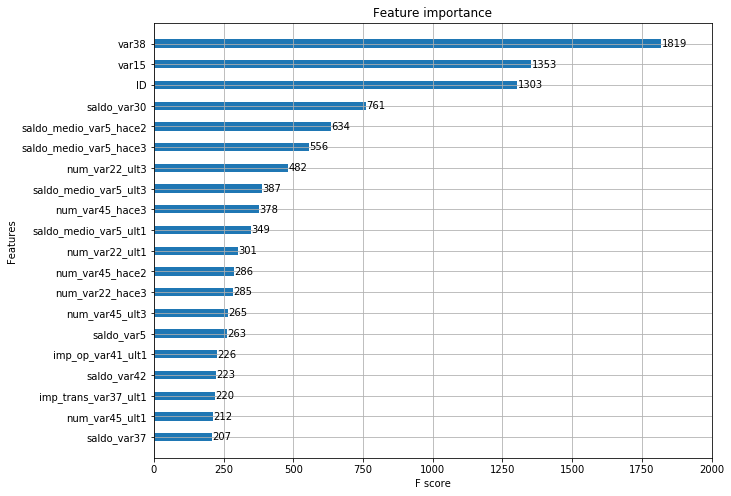

In [21]:
from xgboost import plot_importance
import matplotlib.pyplot as plt 
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)